In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from helper import plot_permute_importance, plot_feature_importance

%matplotlib inline


In [ ]:
# Read the dataset "heart.csv"
df = pd.read_csv("heart.csv")

# Take a quick look at the data 
df.head()


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Assign the predictor and response variables.

# 'AHD' is the response and all the other columns are the predictors
X = df.drop('AHD',axis=1)
y = df.AHD.values

print(X.shape)
print(y.shape)


(303, 13)
(303,)


In [ ]:
# Set the model parameters

# The random state is fixed for testing purposes
random_state = 44

# Choose a `max_depth` for your trees 
max_depth = 7


### SINGLE TREE

In [ ]:
### edTest(test_decision_tree) ###

# Define a Decision Tree classifier with random_state as the above defined variable
# Set the maximum depth to be max_depth
tree = DecisionTreeClassifier(max_depth = max_depth, random_state = random_state)

# Fit the model on the entire data
tree.fit(X, y);

# Using Permutation Importance to get the importance of features for the Decision Tree 
# with random_state as the above defined variable
tree_result = permutation_importance(tree,X,y,random_state = random_state)


### RANDOM FOREST

In [ ]:
### edTest(test_random_forest) ###

# Define a Random Forest classifier with random_state as the above defined variable
# Set the maximum depth to be max_depth and use 10 estimators
forest = RandomForestClassifier(max_depth=max_depth,n_estimators=10,random_state=random_state)

# Fit the model on the entire data
forest.fit(X, y);

# Use Permutation Importance to get the importance of features for the Random Forest model 
# with random_state as the above defined variable
forest_result = permutation_importance(forest,X,y,random_state = random_state)


### PLOTTING THE FEATURE RANKING

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


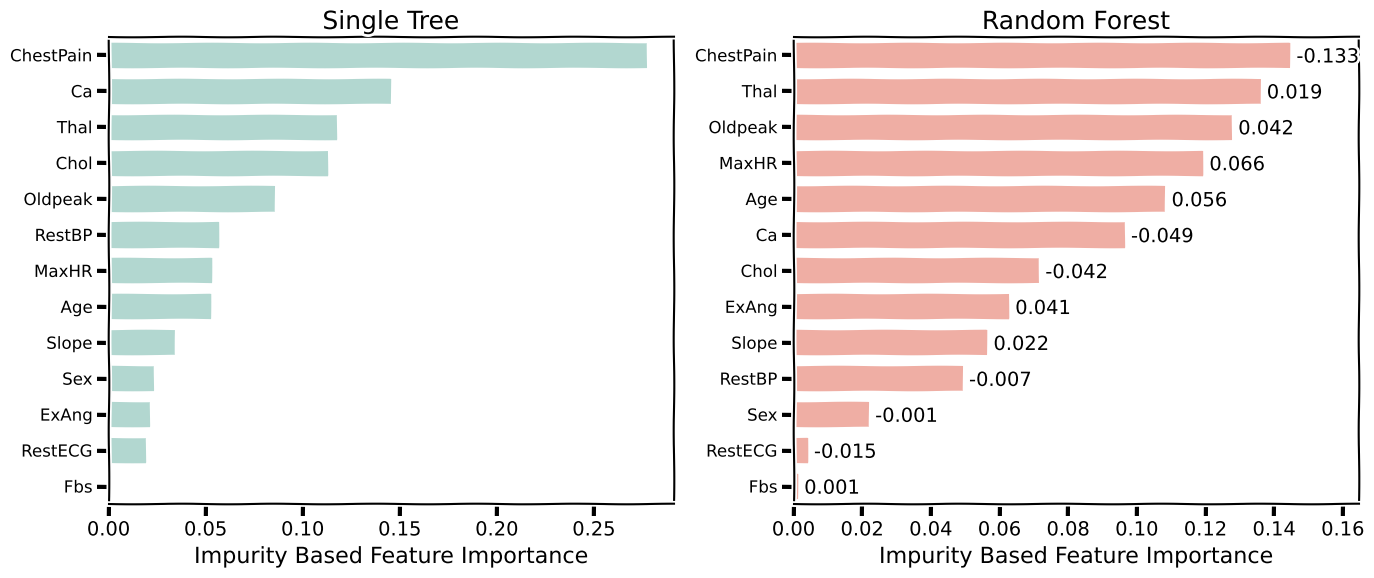

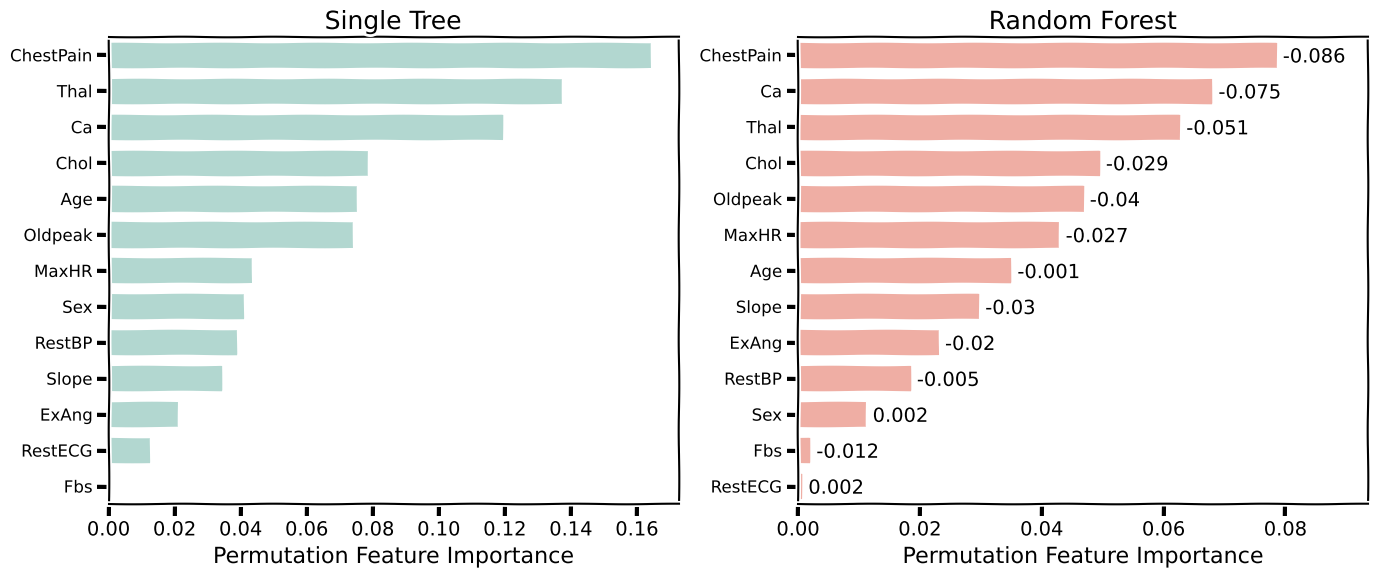

In [ ]:
# Helper code to visualize the feature importance using 'MDI'
plot_feature_importance(tree,forest,X,y);

# Helper code to visualize the feature importance using 'permutation feature importance'
plot_permute_importance(tree_result,forest_result,X,y);
